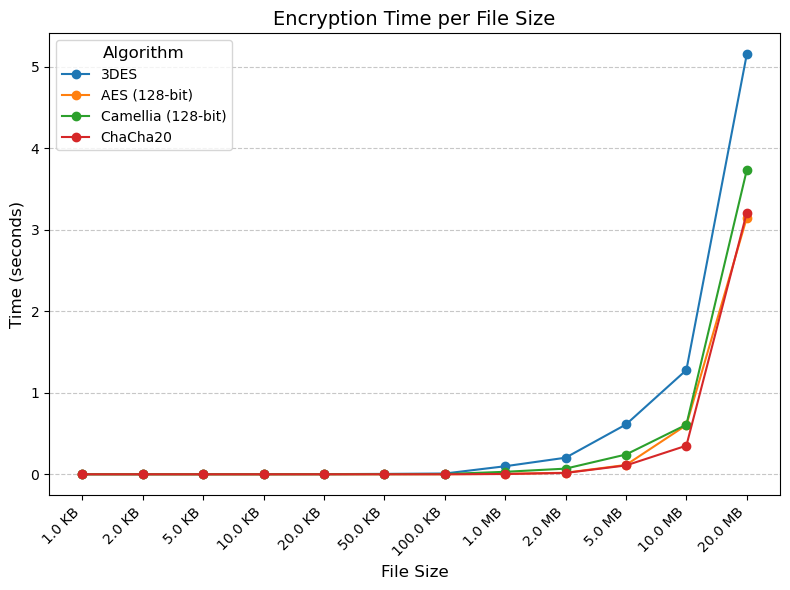

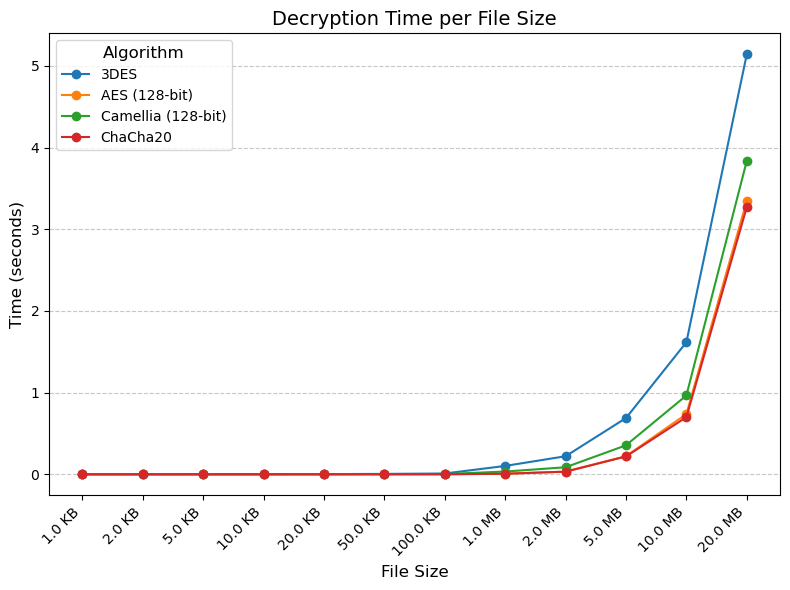

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv("encryption_decryption_average_times.csv")
df = pd.DataFrame(data)

# Function to convert file sizes to human-readable format
def readable_file_size(size_in_bytes):
    if size_in_bytes < 1024 ** 2:  # Less than 1 MB
        return f"{size_in_bytes / 1024:.1f} KB"
    else:
        return f"{size_in_bytes / (1024 ** 2):.1f} MB"

# Apply the function to convert file sizes for the x-axis
df['Readable File Size'] = df['File Size (bytes)'].apply(readable_file_size)

# Plot 1: Encryption Time per File Size
plt.figure(figsize=(8, 6))
for algorithm in df['Algorithm'].unique():
    subset = df[df['Algorithm'] == algorithm]
    plt.plot(
        subset['Readable File Size'], 
        subset['Encryption Time (s)'], 
        marker='o', 
        label=algorithm,
        linewidth=1.5
    )

plt.title("Encryption Time per File Size", fontsize=14)
plt.xlabel("File Size", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Algorithm", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save plot to file
plt.savefig("encryption_time_per_file_size.png", dpi=300)
plt.show()

# Plot 2: Decryption Time per File Size
plt.figure(figsize=(8, 6))
for algorithm in df['Algorithm'].unique():
    subset = df[df['Algorithm'] == algorithm]
    plt.plot(
        subset['Readable File Size'], 
        subset['Decryption Time (s)'], 
        marker='o', 
        label=algorithm,
        linewidth=1.5
    )

plt.title("Decryption Time per File Size", fontsize=14)
plt.xlabel("File Size", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Algorithm", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save plot to file
plt.savefig("decryption_time_per_file_size.png", dpi=300)
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Configure plot style for tab colors
rcParams['font.family'] = 'serif'  # Use serif font
rcParams['text.color'] = 'black'
rcParams['grid.alpha'] = 0.5  # Subtle gridlines

# Function to convert file size to readable format
def readable_file_size(size_in_bytes):
    if size_in_bytes < 1024 ** 2:  # Less than 1 MB
        return f"{size_in_bytes / 1024:.1f} KB"
    else:
        return f"{size_in_bytes / (1024 ** 2):.1f} MB"

# Read the average throughput results from the CSV file
average_throughput_csv_path = "../symmetric_results_throughput/throughput_average_results.csv"
average_throughput = pd.read_csv(average_throughput_csv_path, index_col=[0, 1])
average_throughput = average_throughput.unstack()  # File Size x Algorithms

# Convert file size to readable format
average_throughput.index = [readable_file_size(size) for size in average_throughput.index]

# Plot average throughput with barcharts for each metric
for metric in ["Encryption Throughput (MB/s)", "Decryption Throughput (MB/s)"]:
    plt.figure(figsize=(10, 6))

    # Prepare data for barchart
    grouped = average_throughput[metric]
    x_positions = np.arange(len(grouped.index))  # File sizes
    bar_width = 0.15  # Width of each bar
    offset = 0

    # Plot bars for each algorithm
    for i, algorithm in enumerate(grouped.columns):
        plt.bar(
            x_positions + offset,
            grouped[algorithm],
            width=bar_width,
            label=algorithm
        )
        offset += bar_width

    # Add labels and legend
    plt.title(f"Average {metric} by Algorithm and File Size", fontsize=14)
    plt.xlabel("File Size", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(x_positions + (len(grouped.columns) - 1) * bar_width / 2, grouped.index, rotation=45)
    plt.legend(title="Algorithm", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    # Save the barchart
    metric_cleaned = metric.replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").lower()
    output_path = f"../symmetric_visualization_throughput/{metric_cleaned}_tab_color.png"
    plt.savefig(output_path, dpi=300)
    plt.close()

# Print completion message
print(f"Visualizations saved to: symmetric_visualization_throughput/")


Visualizations saved to: symmetric_visualization_throughput/
